# ACSE-3 (Numerical Methods) <a class="tocSkip">

## Lecture 7: Numerical Differentiation & Boundary Value Problems (BVPs) <a class="tocSkip">
    
### Homework Exercises <a class="tocSkip">

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Homework" data-toc-modified-id="Homework-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Homework</a></span><ul class="toc-item"><li><span><a href="#Homework---Taylor-series" data-toc-modified-id="Homework---Taylor-series-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Homework - Taylor series</a></span><ul class="toc-item"><li><span><a href="#Solution---Taylor-series" data-toc-modified-id="Solution---Taylor-series-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Solution - Taylor series</a></span></li></ul></li><li><span><a href="#Homework---Upwind-vs-central-discretrisation" data-toc-modified-id="Homework---Upwind-vs-central-discretrisation-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Homework - Upwind vs central discretrisation</a></span><ul class="toc-item"><li><span><a href="#Solution---Upwind-vs-central-discretrisation" data-toc-modified-id="Solution---Upwind-vs-central-discretrisation-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Solution - Upwind vs central discretrisation</a></span></li></ul></li><li><span><a href="#Homework---Larger-stencils-/-higher-orders-of-accuracy-[$\star\star$]" data-toc-modified-id="Homework---Larger-stencils-/-higher-orders-of-accuracy-[$\star\star$]-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Homework - Larger stencils / higher orders of accuracy [$\star\star$]</a></span><ul class="toc-item"><li><span><a href="#Solution---Larger-stencils-/-higher-orders-of-accuracy" data-toc-modified-id="Solution---Larger-stencils-/-higher-orders-of-accuracy-1.3.1"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>Solution - Larger stencils / higher orders of accuracy</a></span></li></ul></li><li><span><a href="#Homework---Shooting-method-to-solve-BVPs-(or-IVP-solve-+-root-finding)---pure-diffusion-case-[$\star$]" data-toc-modified-id="Homework---Shooting-method-to-solve-BVPs-(or-IVP-solve-+-root-finding)---pure-diffusion-case-[$\star$]-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Homework - Shooting method to solve BVPs (or IVP solve + root finding) - pure diffusion case [$\star$]</a></span><ul class="toc-item"><li><span><a href="#Solution---Shooting-method-to-solve-BVPs-(or-IVP-solve-+-root-finding)---pure-diffusion-case" data-toc-modified-id="Solution---Shooting-method-to-solve-BVPs-(or-IVP-solve-+-root-finding)---pure-diffusion-case-1.4.1"><span class="toc-item-num">1.4.1&nbsp;&nbsp;</span>Solution - Shooting method to solve BVPs (or IVP solve + root finding) - pure diffusion case</a></span></li></ul></li><li><span><a href="#Homework---Shooting-method-to-solve-BVPs-(or-IVP-solve-+-root-finding)---advection-diffusion-case-[$\star$]" data-toc-modified-id="Homework---Shooting-method-to-solve-BVPs-(or-IVP-solve-+-root-finding)---advection-diffusion-case-[$\star$]-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Homework - Shooting method to solve BVPs (or IVP solve + root finding) - advection-diffusion case [$\star$]</a></span><ul class="toc-item"><li><span><a href="#Solution---Shooting-method-to-solve-BVPs-(or-IVP-solve-+-root-finding)---advection-diffusion-case" data-toc-modified-id="Solution---Shooting-method-to-solve-BVPs-(or-IVP-solve-+-root-finding)---advection-diffusion-case-1.5.1"><span class="toc-item-num">1.5.1&nbsp;&nbsp;</span>Solution - Shooting method to solve BVPs (or IVP solve + root finding) - advection-diffusion case</a></span></li></ul></li><li><span><a href="#Homework---Sparse-matrices-&amp;-Iterative-solvers-[$\star\star$]" data-toc-modified-id="Homework---Sparse-matrices-&amp;-Iterative-solvers-[$\star\star$]-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Homework - Sparse matrices &amp; Iterative solvers [$\star\star$]</a></span><ul class="toc-item"><li><span><a href="#Solutions---Sparse-matrices-&amp;-Iterative-solvers" data-toc-modified-id="Solutions---Sparse-matrices-&amp;-Iterative-solvers-1.6.1"><span class="toc-item-num">1.6.1&nbsp;&nbsp;</span>Solutions - Sparse matrices &amp; Iterative solvers</a></span></li></ul></li></ul></li></ul></div>

In [4]:
%matplotlib inline
import numpy as np
import scipy.linalg as sl
# we'll start using sparse matrices here
import scipy.sparse as sp
# and linear algebra functions designed for sparse matrices
import scipy.sparse.linalg as spla
import matplotlib.pyplot as plt
# the following allows us to plot triangles indicating convergence order
from mpltools import annotation

# font sizes for plots
plt.rcParams['font.size'] = 12
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial', 'Dejavu Sans']

# Homework

## Homework - Taylor series

[This is a repeat of a question from ACSE-2, in case you didn't get around to it then].

We saw an [animated gif from Wikipedia](https://en.wikipedia.org/wiki/Taylor_series#/media/File:Exp_series.gif) at the start of the lecture for how the Taylor series approximation to the exponential function, around the point $x=0$, more closely resembles the exponential function over the domain $[-3,3]$ as more terms are included in the expansion.

Write a script which computes and plots this approximation for increasing numbers of terms in the expansion (essentially recreating that animation - but a static image will be fine).

Plot the convergence of the RMS (root mean square) error computed with 1000 points over the interval $[-3,3]$ with number of terms.

Hint: since the derivative of $\exp(x)$ is also $\exp(x)$, you can re-use a single function for all the derivatives you require int he Taylor series expansion.

## Homework - Upwind vs central discretrisation

Use our codes `BVP_AD_central` and `BVP_AD_upwind` to compute and plot error convergence for these two schemes for our test problem from the lecture with a Peclet number of 10.
    
Hence, establish that even though the upwind scheme is coupled with a second-order scheme for diffusion, it is the first-order contribution to the overall error which ultimately dominates and so the overall scheme is only first-order accurate.


## Homework - Larger stencils / higher orders of accuracy [$\star\star$]

We saw in the lecture first- and second-order approximations to the first derivative.

By making use of more points (expanding the stencil) it is possible to come up with approximations of arbitrary order.

Tables of coefficients, assuming a uniform mesh, can be found at:
<https://en.wikipedia.org/wiki/Finite_difference_coefficient>

Try expanding our example from the lecture where we computed the first derivative of $\sin(x)$ at the location $x=0.8$ and plotted the error as a function of $\Delta x$, with some other examples of finite difference stencils from the tables at that web page.

[NB. the part of the question above is quite simple - in the sample solution I demonstrate an implementation of the third order accurate scheme; the part of the question below is more complicated].

Note that in the section of that web page titled "Arbitrary stencil points" it also gives a matrix system which can be solved for the finite difference coefficients which provides an approximation of arbitrary order derivatices on an arbitrary stencil. 

For a more in-depth description and derivation take a look at: <http://web.media.mit.edu/~crtaylor/calculator.html>
(click on "How does it work?").

Write some code to construct and solve this matrix system, and hence extend the convergence plot we presented above for the first derivative of $\sin(x)$ and $x=0.8$ for orders 1-6.

## Homework - Shooting method to solve BVPs (or IVP solve + root finding) - pure diffusion case [$\star$]

Recall the BVP obtained from considering the steady state solution to the diffusion problem in 1D with Dirichlet BCs specified at the two ends of the domain:

$$\kappa\frac{\partial^2 c}{\partial x^2}=0, \;\;\;\; c(0) = 0, \;\;\;\; c(1)=1.$$

First remind yourself of the exact solution to the problem and plot the numerical solution obtained from discretising the problem using central differences and solving the resulting linear matrix system (we did this in the lecture).

Once you've done this let's try to solve this problem using a *shooting method* instead (we already saw an example of this in the LEcture 5 homework).

First note that we can rewrite our second-order problem in the form of two coupled first-order ODEs

$$
\boldsymbol{u}_x 
= 
\begin{bmatrix} 
u_2 \\ 
0 
\end{bmatrix}
$$

where 

$$
\boldsymbol{u} 
\equiv
\begin{bmatrix} 
u_1 \\ 
u_2 
\end{bmatrix}
= 
\begin{bmatrix} 
c \\ 
c_x 
\end{bmatrix}
$$

We are going to solve this problem as an IVP from $x=0$ up to $x=L$ (thinking of $x$ as a time like variable).

An IVP specified all auxiliary conditions as the same location (at the initial "time", or here at $x=0$).

We know that $c(0)=0$ and hence $u_1(0)=0$, but what do we take for $u_2(0)$?

The idea behind the shooting method is to try (i.e. solve the "IVP" for) different values of $u_2(0)$, iterating until we find a solution which achieves our additional condition - here that $u_1(1)=1$. In practice we iterate until we reach this goal to a user-defined tolerance.

## Homework - Shooting method to solve BVPs (or IVP solve + root finding) - advection-diffusion case [$\star$]

Consider now the advection-diffusion problem

$$U\frac{\partial c}{\partial x} = \kappa\frac{\partial^2 c}{\partial x^2}, \;\;\;\; c(0) = 0, \;\;\;\; c(1)=1 $$

We can write this as two coupled first-order ODEs

$$
\boldsymbol{u}_x 
= 
\begin{bmatrix} 
u_2 \\ 
\frac{U}{\kappa}u_2 
\end{bmatrix}
$$

where 

$$
\boldsymbol{u} 
\equiv
\begin{bmatrix} 
u_1 \\ 
u_2 
\end{bmatrix}
= 
\begin{bmatrix} 
c \\ 
c_x 
\end{bmatrix}
$$

Again, we are going to solve this problem as an IVP from $x=0$ up to $x=1$ with $u_1(0)=0$, but $u_2(0)$ unknown.

Final u2(0) guess 4.548135e-04 gives a value of u1(1) of 9.999973e-01


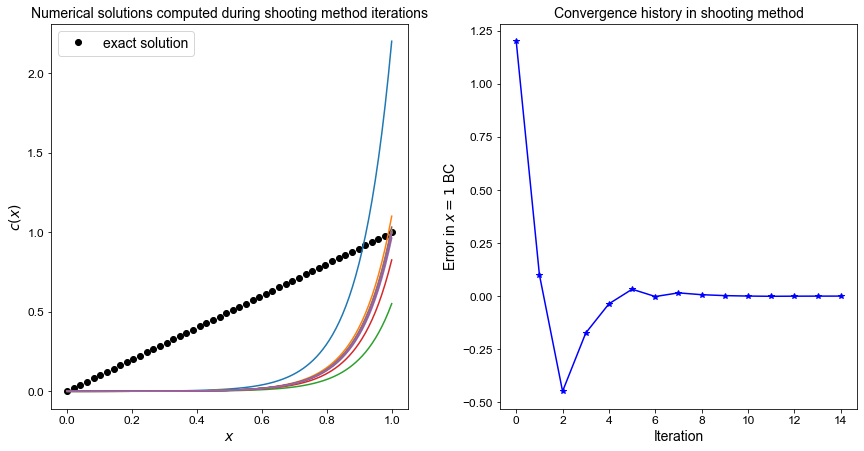

In [12]:
import scipy.integrate as si

tol = 1.e-4
max_iter = 100

Kappa = 0.005
L = 1
CE = 1
Pe = 10
U = Pe * Kappa / L

def shooting_f(x, u):
    return np.array([u[1], U/Kappa*u[1]])

ux_guess_1 = 1.e-6
ux_guess_2 = 2.e-3

iv_range = np.linspace(0.0, 1.0, 100)

sol_1 = si.solve_ivp(shooting_f, [iv_range[0], iv_range[-1]], np.array([0.0, ux_guess_1]), 
                     method='RK45', t_eval=iv_range)
right_value_1 = sol_1.y[0][-1]

sol_2 = si.solve_ivp(shooting_f, [iv_range[0], iv_range[-1]], np.array([0.0, ux_guess_2]), 
                     method='RK45', t_eval=iv_range)
right_value_2 = sol_2.y[0][-1]

for it in range(max_iter):
    ux_guess_mid = (ux_guess_1 + ux_guess_2) / 2
    sol_mid = si.solve_ivp(shooting_f, [iv_range[0], iv_range[-1]], np.array([0.0, ux_guess_mid]), 
                     method='RK45', t_eval=iv_range)
    
    right_value_mid = sol_mid.y[0][-1]
    if it == 0:
        conv_history = (right_value_mid - CE)
        sol_history = sol_mid.y[0]
    else:
        conv_history = np.append(conv_history, (right_value_mid - CE))
        sol_history = np.vstack((sol_history, sol_mid.y[0]))
        
        if np.fabs(right_value_mid - CE) < tol:
            break
    if (right_value_1 - CE) * (right_value_mid - CE) > 0:
        ux_guess_1 = ux_guess_mid
        right_value_1 = right_value_mid
    else:
        ux_guess_2 = ux_guess_mid
        right_value_2 = right_value_mid

print('Final u2(0) guess %e gives a value of u1(1) of %e' %(ux_guess_mid, right_value_mid ))
            
# set up our figs for plotting
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
fig.tight_layout(w_pad=5)  # add some padding otherwise axes labels overlap
# plot exact solution
xf = np.linspace(0, L, 50)
Cex = xf / L * CE
ax1.plot(xf, Cex, 'ko', label='exact solution')
# plot numerical solution from iterations

for it in range(np.shape(sol_history)[0]):
    ax1.plot(iv_range, sol_history[it,:])

ax1.set_xlabel('$x$', fontsize=14)
ax1.set_ylabel('$c(x)$', fontsize=14)
ax1.set_title('Numerical solutions computed during shooting method iterations', fontsize=14)
ax1.legend(loc='best', fontsize=14)

ax2.plot(conv_history, 'b*-')
ax2.set_xlabel('Iteration', fontsize=14)
ax2.set_ylabel('Error in $x=1$ BC', fontsize=14)
ax2.set_title('Convergence history in shooting method', fontsize=14);

## Homework - Sparse matrices & Iterative solvers [$\star\star$]

As we noted in lecture 3 at some point our problems become large enough that we need to use iterative rather than direct linear solvers.

Let's see what happens when we try to use iterative matrix solvers to invert our discretisation matrix.

Update our `BVP_AD_central` function so that it now also returns the $A$ matrix and RHS $\boldsymbol{b}$ vector.


- Check whether the discretisation matrix is symmetric or not.


- Solve the system using one of our direct solvers from L3, e.g. `np.linalg.solve`.


- Recall we said in L3 that the conjugate gradient matrix only works for positive definite matrices. Solve our problem using the CG method and check whether the solution you obtain agrees with the solution from the direct solver.


- GMRES is an alternative iterative solver that does work with nonsymmetric matrices. Solve our problem with GMRES and check whether this solution agrees with the direct solver.


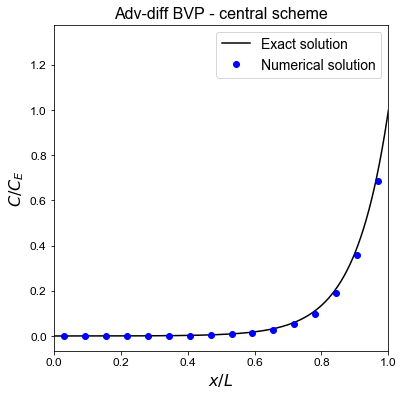

In [32]:
kappa = 0.005
L = 1
Pe = 10
U = Pe * kappa / L
CE = 1

def BVP_AD_central(L, U, kappa, CE, N):
    """ function to assemble and solve the AD BVP problem
    using central differences for both adv and diff.
    
    Returns the mesh x and the solution C
    """
    dx = L / N
    x = np.linspace(-dx / 2, dx / 2 + L, N + 2)
    A = np.zeros((N + 2, N + 2))
    b = np.zeros((N + 2))
    # interior points
    r_diff = kappa / dx**2
    r_adv = 0.5 * U / dx
    for i in range(1, N + 1):
        A[i, i - 1] = r_diff + r_adv
        A[i, i] = -2 * r_diff
        A[i, i + 1] = r_diff - r_adv
        b[i] = 0
    # BC1
    A[0, 0] = 0.5
    A[0, 1] = 0.5
    b[0] = 0
    # BC2
    A[N + 1, N] = 0.5
    A[N + 1, N + 1] = 0.5
    b[N + 1] = CE  # BC2
    # invert matrix
    C = np.linalg.solve(A, b)
    return x, C , A, b


# call function to generate numerical solution
x, C, A, b = BVP_AD_central(L, U, kappa, CE, 16)

# construct the exact solution
xf = np.linspace(0, L, 1000)
Cex = CE * (np.exp(Pe * xf / L) - 1) / (np.exp(Pe) - 1)

# set up figure
fig = plt.figure(figsize=(6, 6))
ax1 = plt.subplot(111)
ax1.plot(xf, Cex, '-k', label='Exact solution')
ax1.plot(x, C, 'ob', label='Numerical solution')
ax1.set_xlabel('$x/L$', fontsize=16)
ax1.set_ylabel('$C/C_E$', fontsize=16)
ax1.set_title('Adv-diff BVP - central scheme', fontsize=16)
ax1.legend(loc='best', fontsize=14)

# to exclude ghost points just restrict the x limit of the plot
ax1.set_xlim(0, 1);

In [35]:
import scipy.sparse as sp
import scipy.sparse.linalg as spl

residuals_cg = []
def callback(xk):
    residuals_cg.append(np.linalg.norm( ( A @ xk ) - b ) )
    
x_cg, info = spl.cg(A, b, x0=None, tol=1.e-10, maxiter=1000, callback=callback)

array([-0.01588832, -0.0084175 ,  0.12909391,  0.37702262,  0.54079104,
        0.63828588,  0.39788163, -0.54196495, -0.82715713, -2.70218445,
       -1.92532073, -5.10737296, -5.08947749, -7.24272312, -5.35443765,
       -1.0601683 ,  1.34186872,  7.93883723])

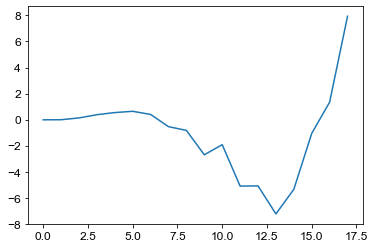

In [36]:
plt.plot(x_cg)
x_cg

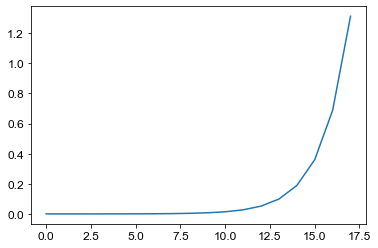

In [27]:
plt.plot(C)

In [24]:
C

array([-1.00377926e-05,  1.00377926e-05,  4.83639098e-05,  1.21531952e-04,
        2.61216395e-04,  5.27886697e-04,  1.03698455e-03,  2.00889862e-03,
        3.86437094e-03,  7.40663629e-03,  1.41691429e-02,  2.70793827e-02,
        5.17262041e-02,  9.87792269e-02,  1.88607725e-01,  3.60098494e-01,
        6.87489962e-01,  1.31251004e+00])

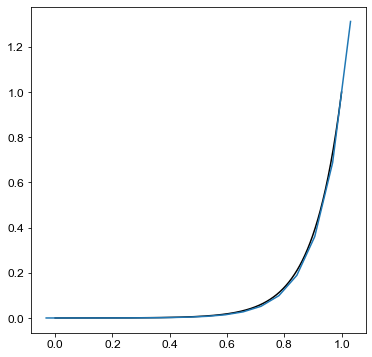

In [29]:
xf = np.linspace(0, L, 1000)
Cex = CE * (np.exp(Pe * xf / L) - 1) / (np.exp(Pe) - 1)

# set up figure
fig = plt.figure(figsize=(6, 6))
ax1 = plt.subplot(111)
ax1.plot(xf, Cex, '-k', label='Exact solution')
ax1.plot(x, C)